### Análise Bivariada

**Objetivos**
- Analisar as variávies com relação a resposta
- Interpretar o comportamento dos dados
- Avaliar a correlação e associação das variáveis com relação a resposta

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats.contingency import association
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
df = pd.read_csv("../Dados/telco_dataset.csv")

In [4]:
df.head(3)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No     1.0           No   
1  5575-GNVDE    Male              0      No         No    34.0          Yes   
2  3668-QPYBK    Male              0      No         No     2.0          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges  Churn  
0  Electronic check          29.85         29.85     No  
1      Mailed check          56.95       1889.50     No  
2      Mailed check          53.85        108.15    Yes  

[3 rows x 21 columns]

In [27]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [30]:
df.shape

(7043, 21)

#### Criando Funções Auxiliares

In [5]:
def plt_percentages(feature, df):
    g = df.groupby(feature)["Churn"].value_counts().to_frame().reset_index()
    g["% clientes"] = g["count"]/len(df)
    plt.figure(figsize=(10, 4.5))
    ax = sns.barplot(x=feature, y= "% clientes", hue='Churn', data=g, palette="PuBu")
    ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    ax.plot()

#### Gender & SeniorCitizen

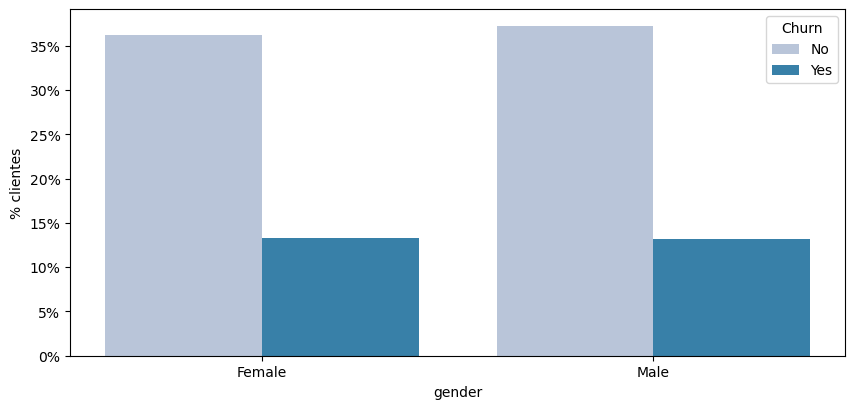

In [7]:
plt_percentages("gender", df)

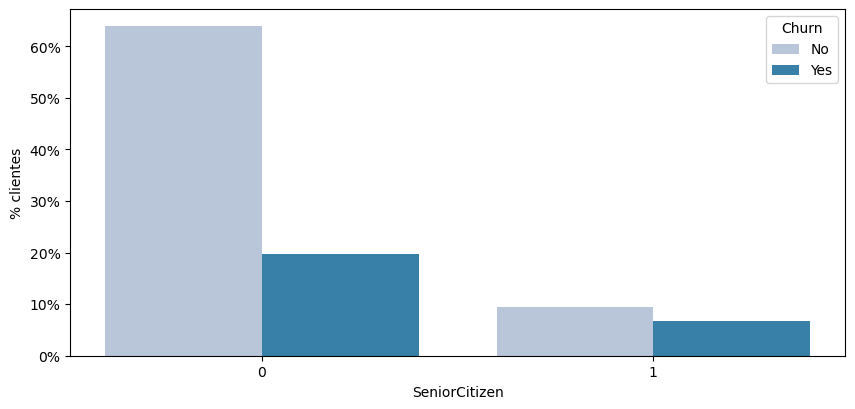

In [8]:
plt_percentages("SeniorCitizen", df)

#### Partners & Dependents

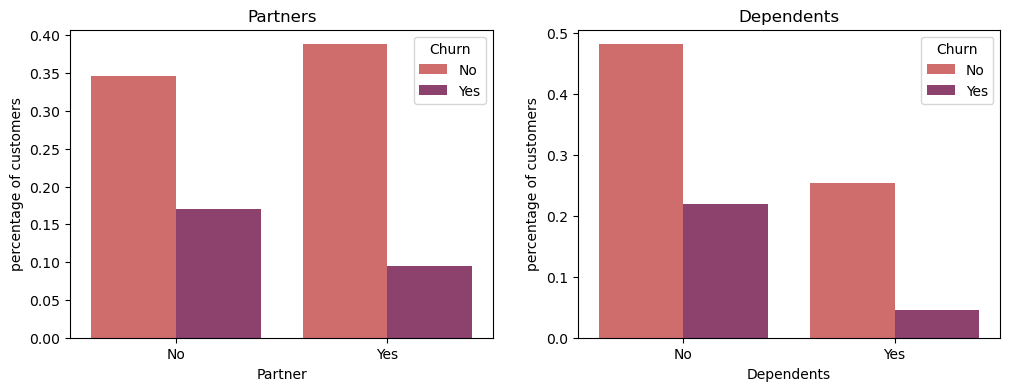

In [10]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Partners")
axis[1].set_title("Dependents")
axis_y = "percentage of customers"

# Partner
gp_partner = df.groupby('Partner')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().reset_index().rename(columns={"count": axis_y})
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0], palette = "flare")

# Dependents
gp_dep = df.groupby('Dependents')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().reset_index().rename(columns={"count": axis_y})
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1], palette = "flare")

#### Telefone e Serviços de Internet

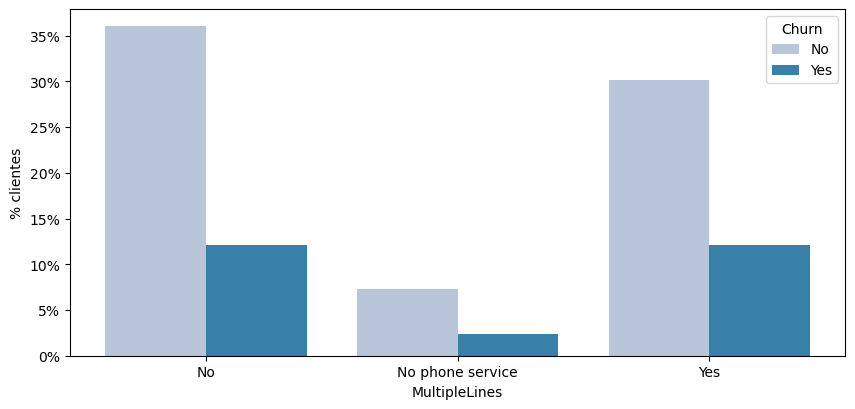

In [12]:
plt_percentages("MultipleLines", df)

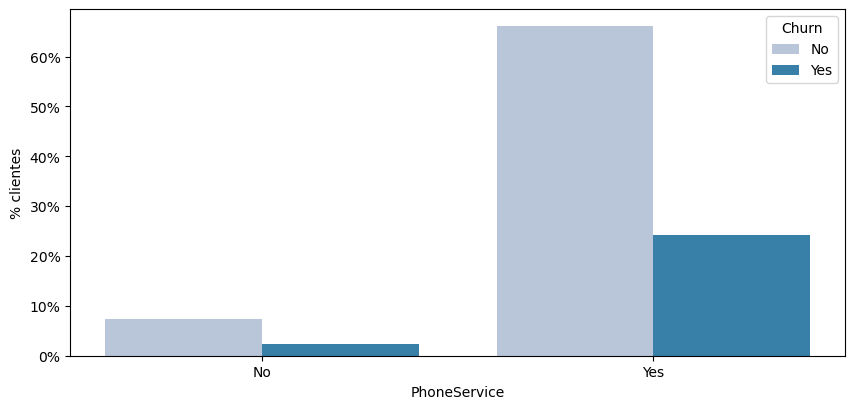

In [13]:
plt_percentages("PhoneService", df)

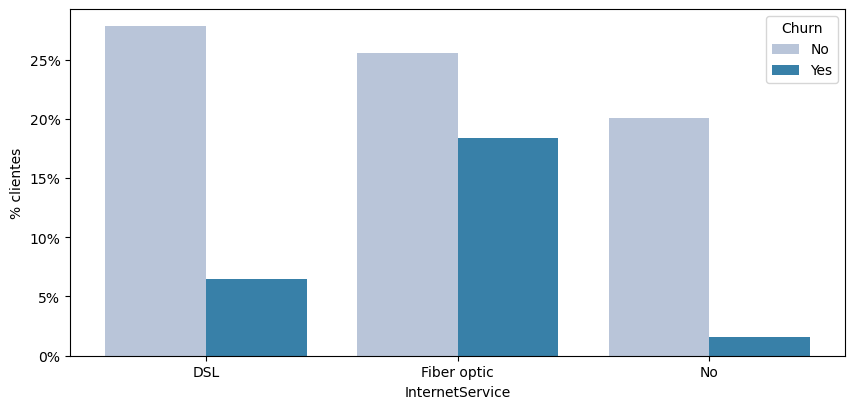

In [14]:
plt_percentages("InternetService", df)

#### Serviços adicionais de Internet

In [28]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
df1.head()

variable Has service
0  OnlineSecurity          No
1  OnlineSecurity         Yes
2  OnlineSecurity         Yes
3  OnlineSecurity         Yes
4  OnlineSecurity          No

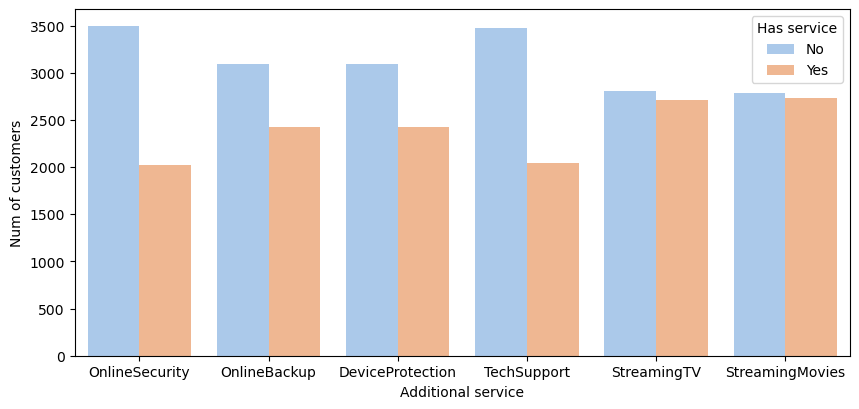

In [ ]:
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service', palette="pastel")
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

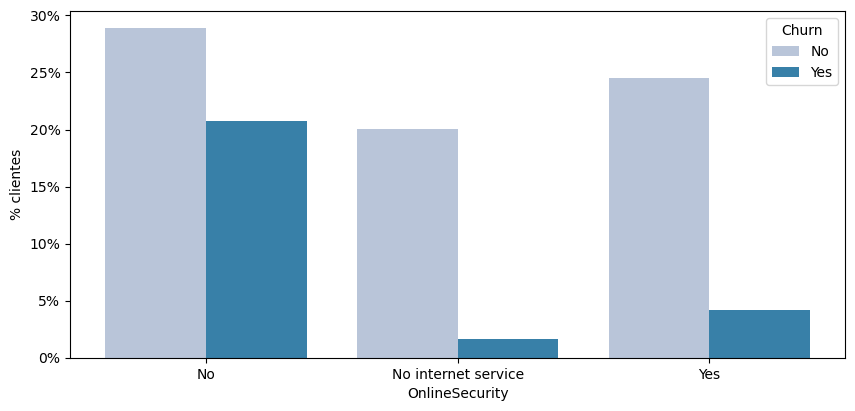

In [17]:
plt_percentages("OnlineSecurity", df)

#### Contrato e Pagamento

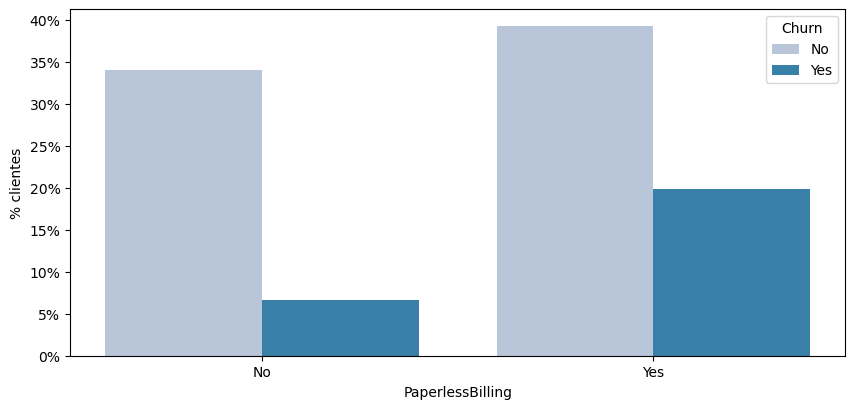

In [19]:
plt_percentages("PaperlessBilling", df)

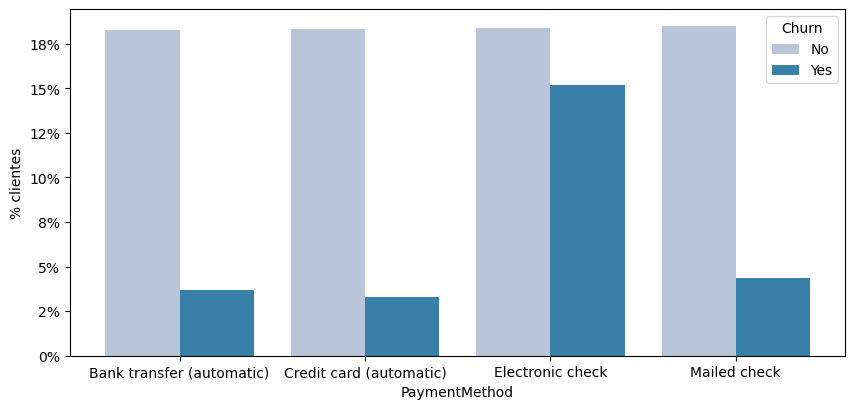

In [20]:
plt_percentages("PaymentMethod", df)

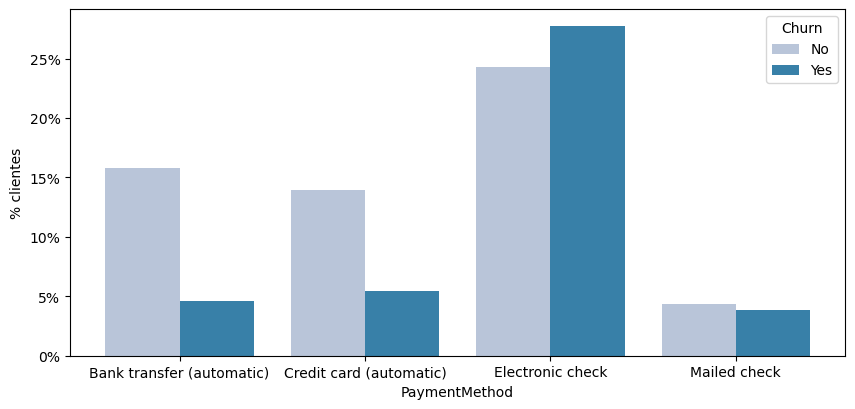

In [21]:
plt_percentages("PaymentMethod", df[df['SeniorCitizen'] == 1])

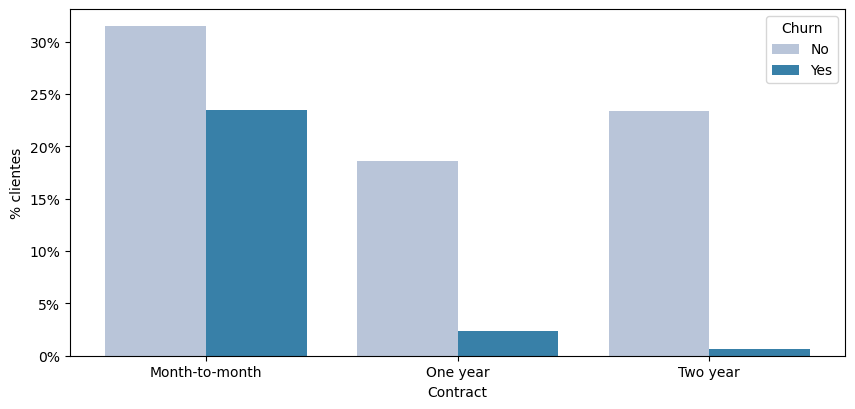

In [22]:
plt_percentages("Contract", df)

### Análise das Variáveis Numéricas

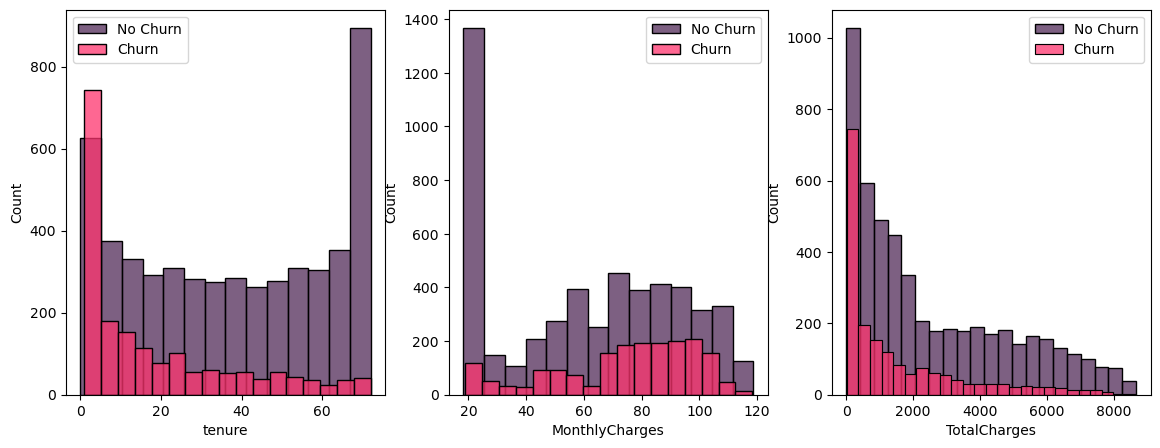

In [24]:
# Uma outra forma de ver a distribuição. Desta vez separando pela variável target
fig=plt.figure(figsize=(14, 5))
fig = plt.subplot(131)
sns.histplot(df[df['Churn'] == "No"]["tenure"],label='No Churn', color='#512b58') 
sns.histplot(df[df['Churn'] == "Yes"]["tenure"],label='Churn', color='#fe346e')
plt.legend()

fig = plt.subplot(132)
sns.histplot(df[df['Churn'] == "No"]["MonthlyCharges"], label='No Churn', color='#512b58') 
sns.histplot(df[df['Churn'] == "Yes"]["MonthlyCharges"], label='Churn', color='#fe346e') 
plt.legend()

fig = plt.subplot(133)
sns.histplot(df[df['Churn'] == "No"]["TotalCharges"], label='No Churn', color='#512b58') 
sns.histplot(df[df['Churn'] == "Yes"]["TotalCharges"], label='Churn', color='#fe346e') 
plt.legend()

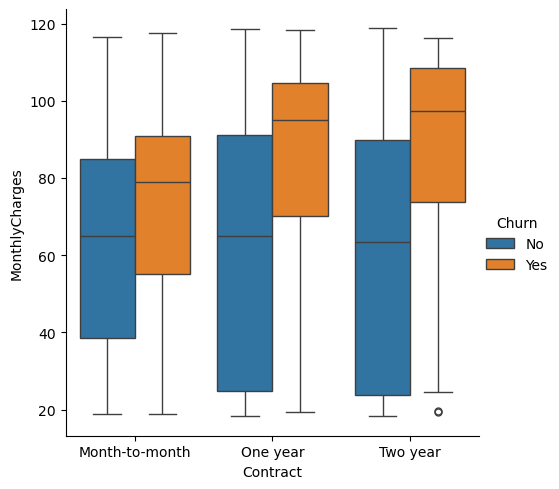

In [25]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=df)

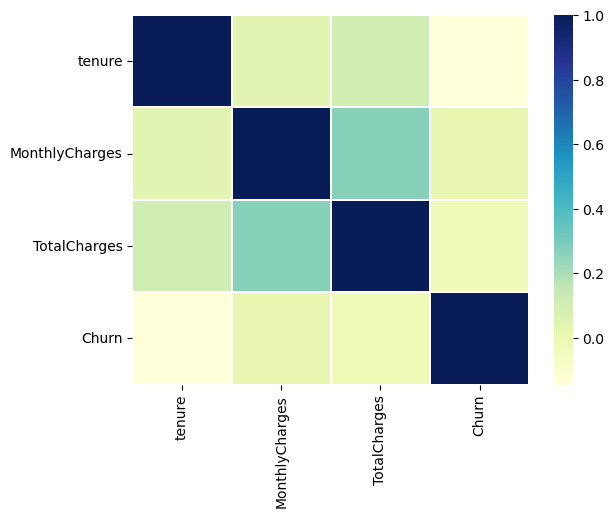

In [26]:
corr = df[["tenure", "MonthlyCharges", "TotalCharges", "Churn"]].apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")